# Bank Customer Segmentation Analysis

This notebook performs customer segmentation analysis using banking data to identify distinct customer groups based on their banking behavior and characteristics.

## 1. Setup and Data Loading

First, let's import the necessary libraries and load our dataset.

In [16]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set style for visualizations
sns.set_theme()
plt.style.use('default')

## 2. Data Preprocessing

We'll prepare our data for analysis by handling missing values, scaling features, and encoding categorical variables.

In [24]:
# Load the dataset
df = pd.read_csv('../data/bank-marketing.csv', sep=';')

# Display basic information about the dataset
print("Dataset Info:")
print("\nShape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSample of data:")
display(df.head())

# Basic statistics
print("\nBasic Statistics:")
display(df.describe())

# Check available columns
print("Available columns in the dataset:")
print(df.columns.tolist())

# Check numerical columns
print("\nNumerical columns:")
print(df.select_dtypes(include=['int64', 'float64']).columns.tolist())

Dataset Info:

Shape: (41188, 21)

Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

Sample of data:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



Basic Statistics:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Available columns in the dataset:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

Numerical columns:
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


## 3. Exploratory Data Analysis

Let's explore our data to understand the distributions and relationships between variables.

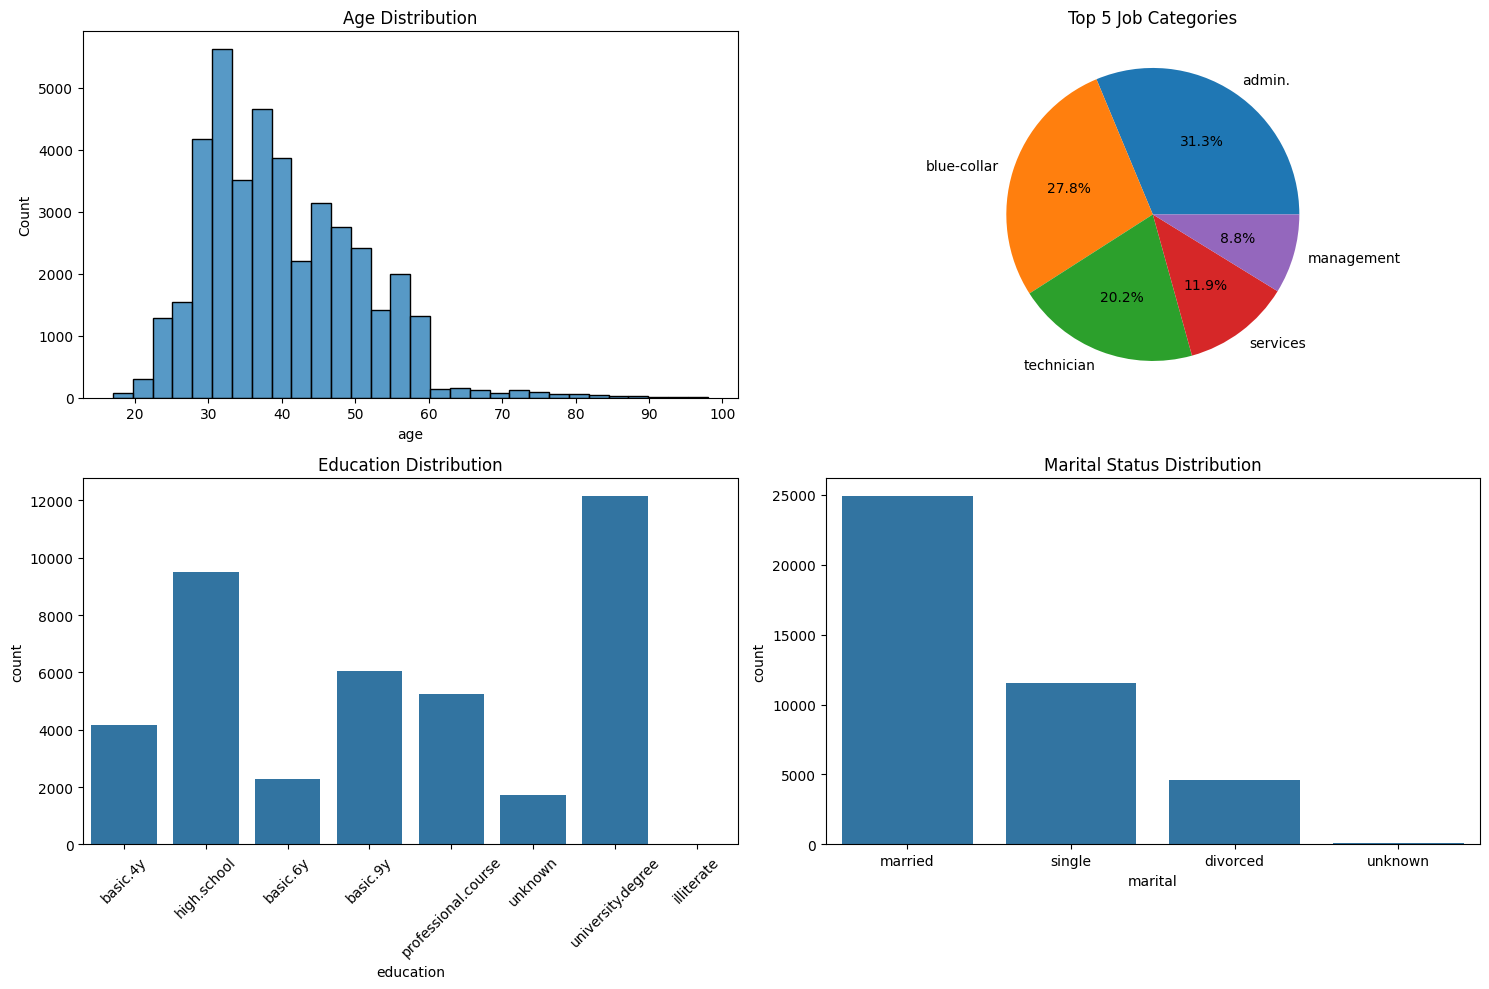

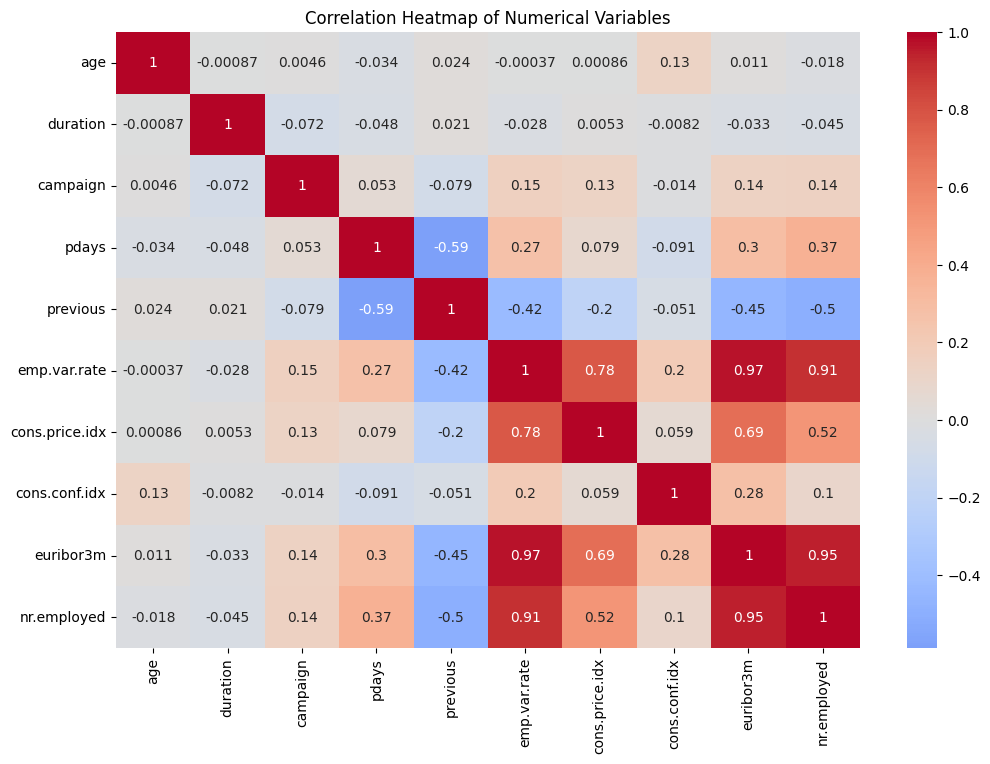

In [18]:
# Create visualizations for key features
plt.figure(figsize=(15, 10))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='age', bins=30)
plt.title('Age Distribution')

# Job distribution
plt.subplot(2, 2, 2)
job_counts = df['job'].value_counts()
plt.pie(job_counts.values[:5], labels=job_counts.index[:5], autopct='%1.1f%%')
plt.title('Top 5 Job Categories')

# Education distribution
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='education')
plt.xticks(rotation=45)
plt.title('Education Distribution')

# Marital status distribution
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='marital')
plt.title('Marital Status Distribution')

plt.tight_layout()
plt.show()

# Correlation heatmap for numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## 4. Customer Segmentation

We'll use clustering algorithms to segment customers into distinct groups.

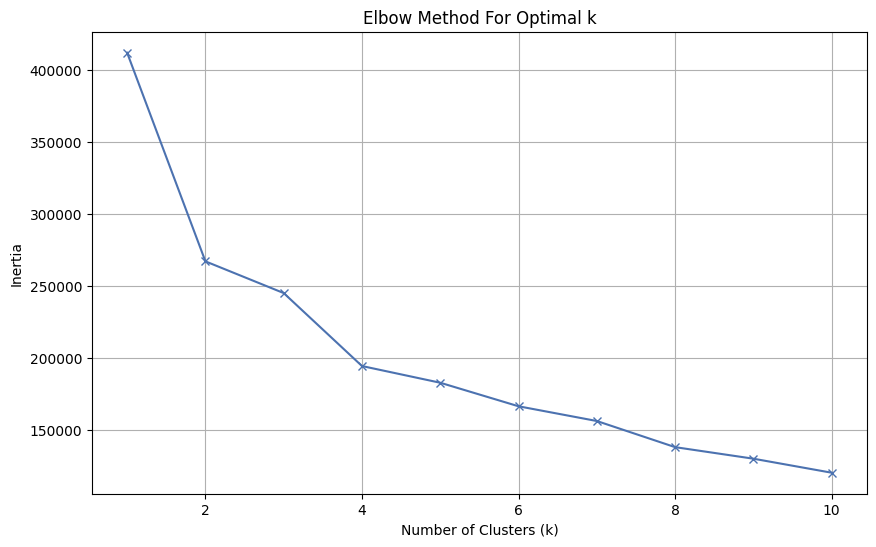

In [30]:
# Determine optimal number of clusters using elbow method
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

## 5. Results Analysis

Let's analyze and visualize our customer segments.

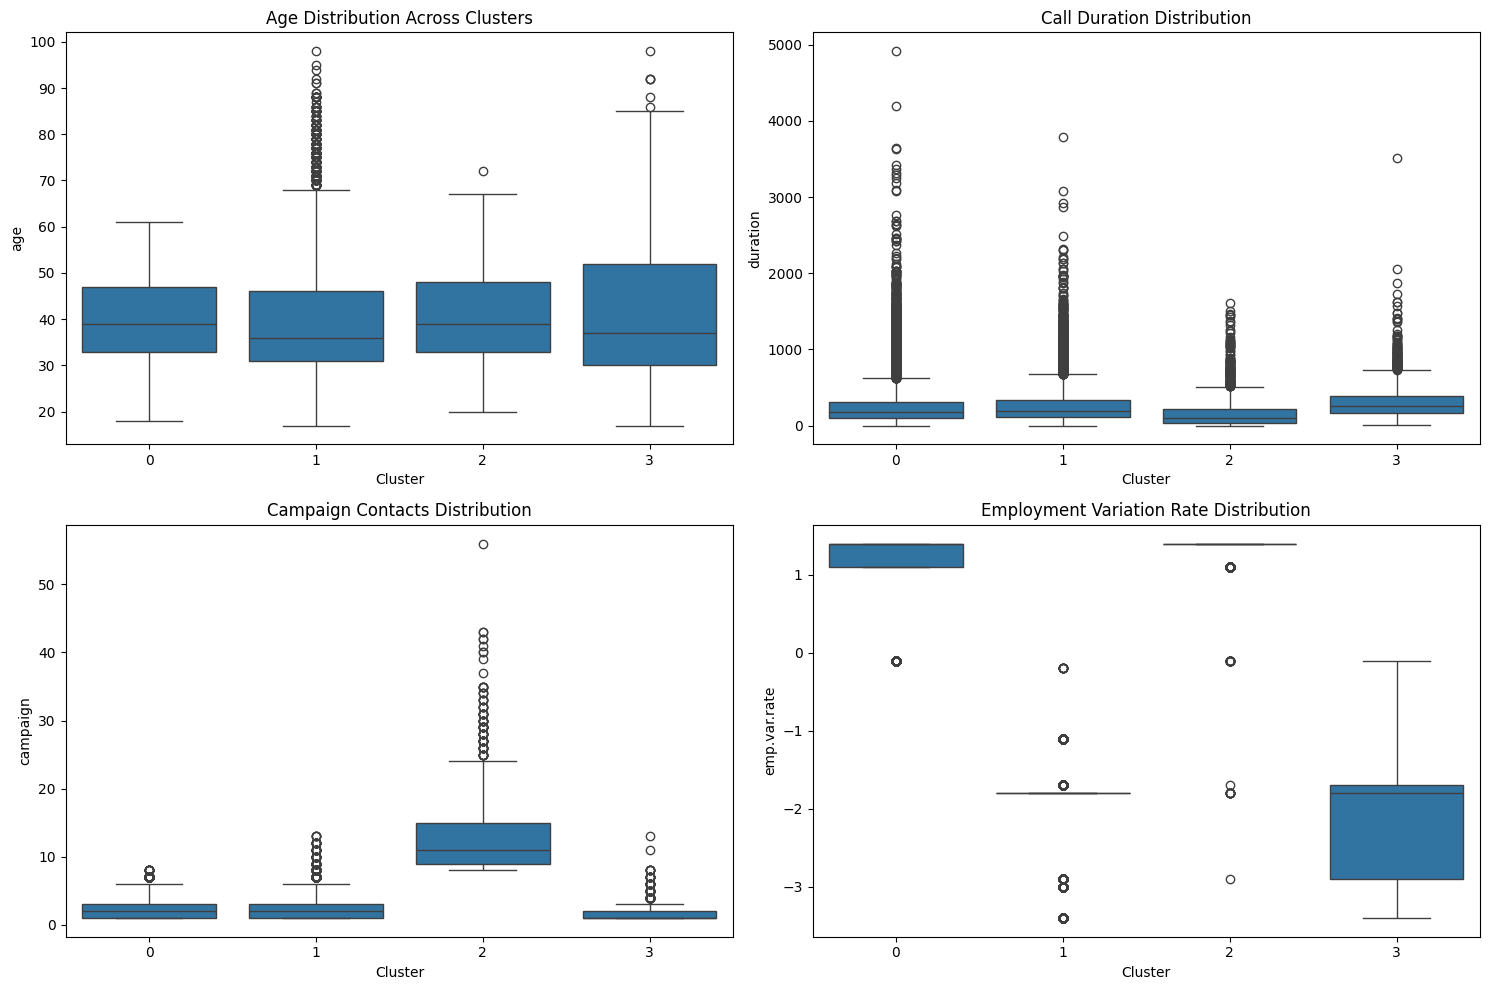


Number of customers in each cluster:
Cluster
0    26093
1    11991
2     1564
3     1540
Name: count, dtype: int64

Cluster Centers:
     age  duration  campaign   pdays  previous  emp.var.rate  cons.price.idx  \
0  40.17    256.89      2.20  999.00      0.03          1.11           93.84   
1  39.39    263.75      2.11  999.00      0.32         -2.03           92.99   
2  40.55    176.67     12.87  999.00      0.00          1.29           93.95   
3  41.91    322.33      1.83   22.13      1.69         -2.09           93.35   

   cons.conf.idx  euribor3m  nr.employed  
0         -39.43       4.81      5213.00  
1         -43.19       1.20      5077.96  
2         -39.93       4.89      5219.39  
3         -38.33       0.98      5028.54  

Cluster Profiles:
           age  duration  campaign   pdays  previous  emp.var.rate  \
Cluster                                                              
0        40.17    256.91      2.20  999.00      0.03          1.11   
1        39.39    263

In [32]:
# 1. First perform the clustering
optimal_k = 4  # We can adjust this based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(df_cluster)

# 2. Add cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# 3. Now create the visualizations
plt.figure(figsize=(15, 10))

# Age distribution across clusters
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Cluster', y='age')
plt.title('Age Distribution Across Clusters')

# Duration distribution
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Cluster', y='duration')
plt.title('Call Duration Distribution')

# Campaign contacts distribution
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Cluster', y='campaign')
plt.title('Campaign Contacts Distribution')

# Employment variation rate distribution
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Cluster', y='emp.var.rate')
plt.title('Employment Variation Rate Distribution')

plt.tight_layout()
plt.show()

# 4. Print cluster sizes
print("\nNumber of customers in each cluster:")
print(df['Cluster'].value_counts())

# 5. Calculate and display cluster centers
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=df_cluster.columns
)

print("\nCluster Centers:")
print(cluster_centers.round(2))

# 6. Create cluster profiles
cluster_profiles = df.groupby('Cluster').agg({
    'age': 'mean',
    'duration': 'mean',
    'campaign': 'mean',
    'pdays': 'mean',
    'previous': 'mean',
    'emp.var.rate': 'mean',
    'cons.price.idx': 'mean',
    'cons.conf.idx': 'mean',
    'euribor3m': 'mean',
    'nr.employed': 'mean'
}).round(2)

print("\nCluster Profiles:")
print(cluster_profiles)